# Neural Network (Gas Turbines)

### predicting turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.   
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.  

The explanations of sensor measurements and their brief statistics are given below.  

Variable (Abbr.) Unit Min Max Mean  
Ambient temperature (AT) C â€“6.23 37.10 17.71  
Ambient pressure (AP) mbar 985.85 1036.56 1013.07  
Ambient humidity (AH) (%) 24.08 100.20 77.87  
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93  
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56  
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43  
Turbine after temperature (TAT) C 511.04 550.61 546.16  
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06  
Turbine energy yield (TEY) MWH 100.02 179.50 133.51  
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37  
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29  

# 1. import Libs

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from keras.models import Sequential
from keras.callbacks import History 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')   
history = History()
import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [4]:
gas_tubine = pd.read_csv('gas_turbines.csv')
gas_tubine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# 3. EDA

In [5]:
gas_tubine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas_tubine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
gas_tubine.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [9]:
# check for duplicate data
duplicate = gas_tubine.duplicated()
print(duplicate.sum())
gas_tubine[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Checking Outlires

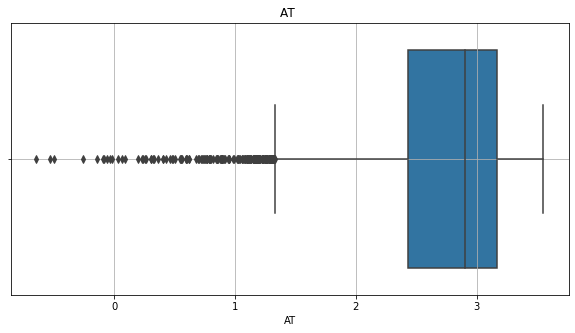

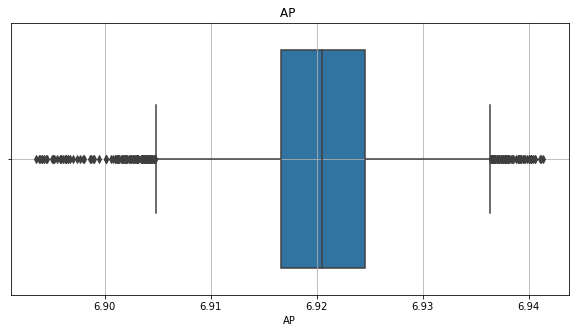

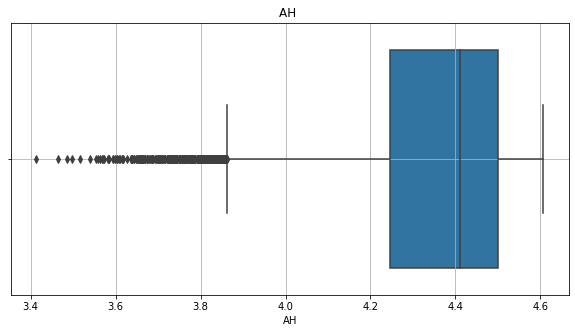

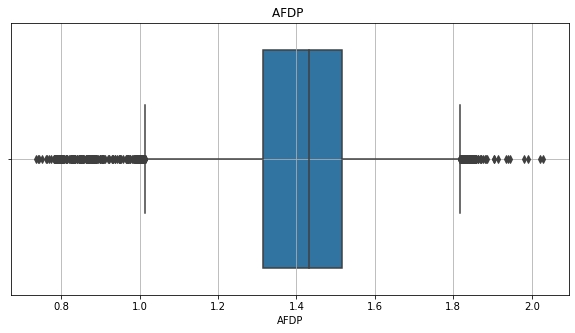

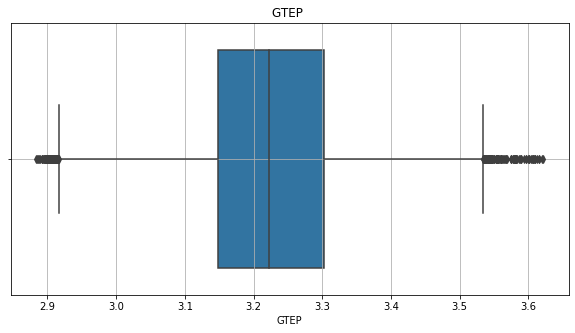

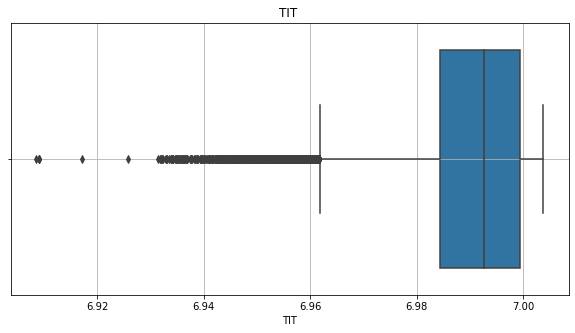

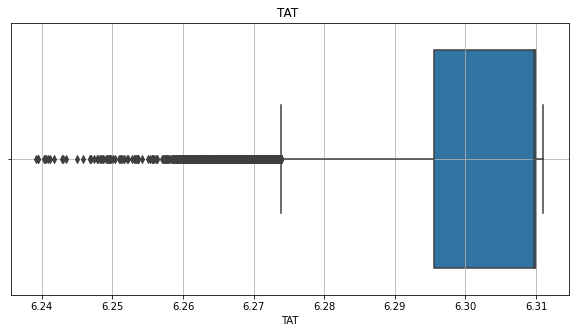

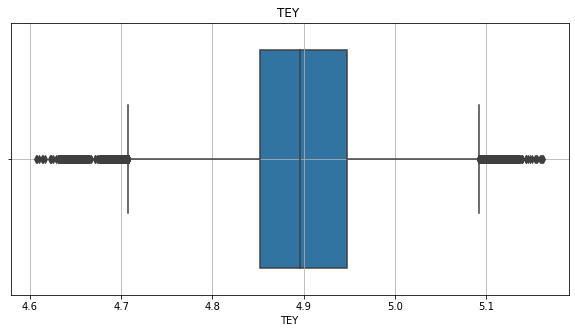

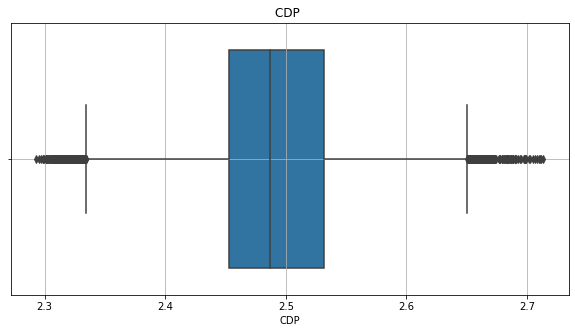

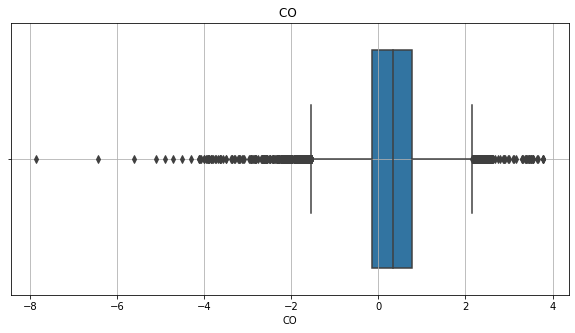

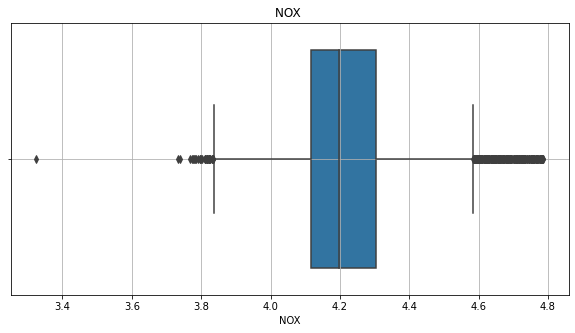

In [10]:

for i in gas_tubine.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(np.log(gas_tubine[i]))
        plt.title(i+ ' ')
        plt.grid()
        plt.show()

Skewness = 0.14596270190452942
Kurtosis = -0.4870582497451621


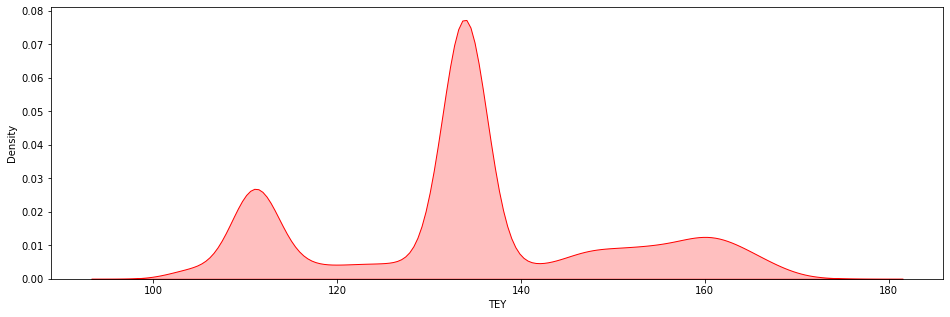

In [11]:
plt.figure(figsize=(16,5))
print("Skewness =",gas_tubine['TEY'].skew())
print("Kurtosis =",gas_tubine['TEY'].kurtosis())
sns.kdeplot(gas_tubine['TEY'],shade=True,color='r')
# plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### The Data is highly skewed and has Negative kurtosis value

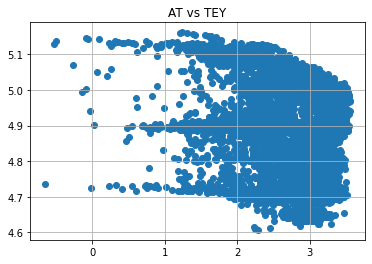

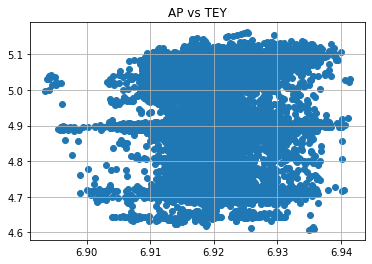

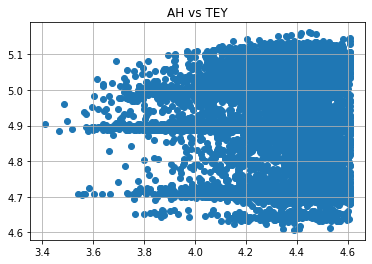

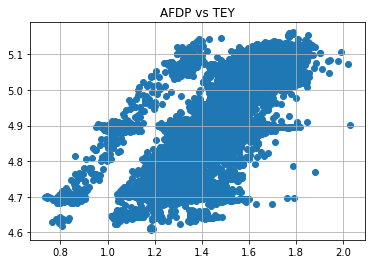

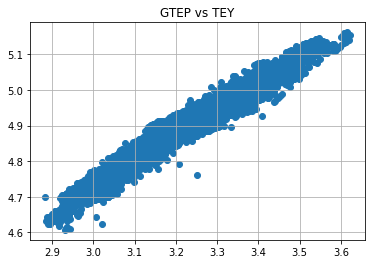

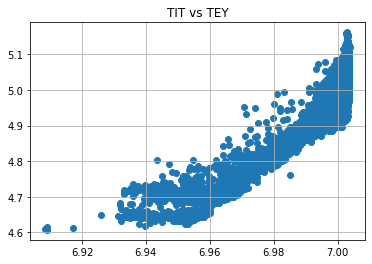

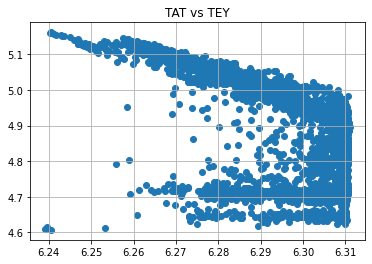

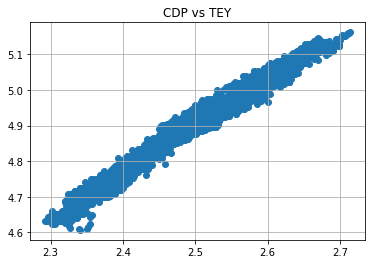

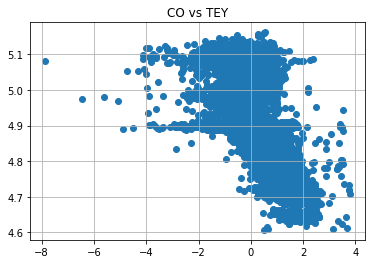

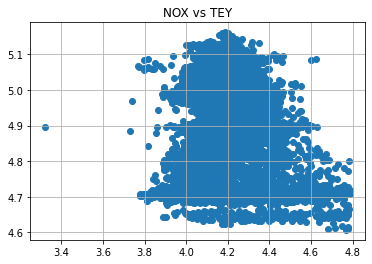

In [12]:
for i in gas_tubine.columns:
    if i!="TEY": 
        plt.scatter(np.log(gas_tubine[i]), np.log(gas_tubine['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [13]:
num_columns = gas_tubine.select_dtypes(exclude='object')

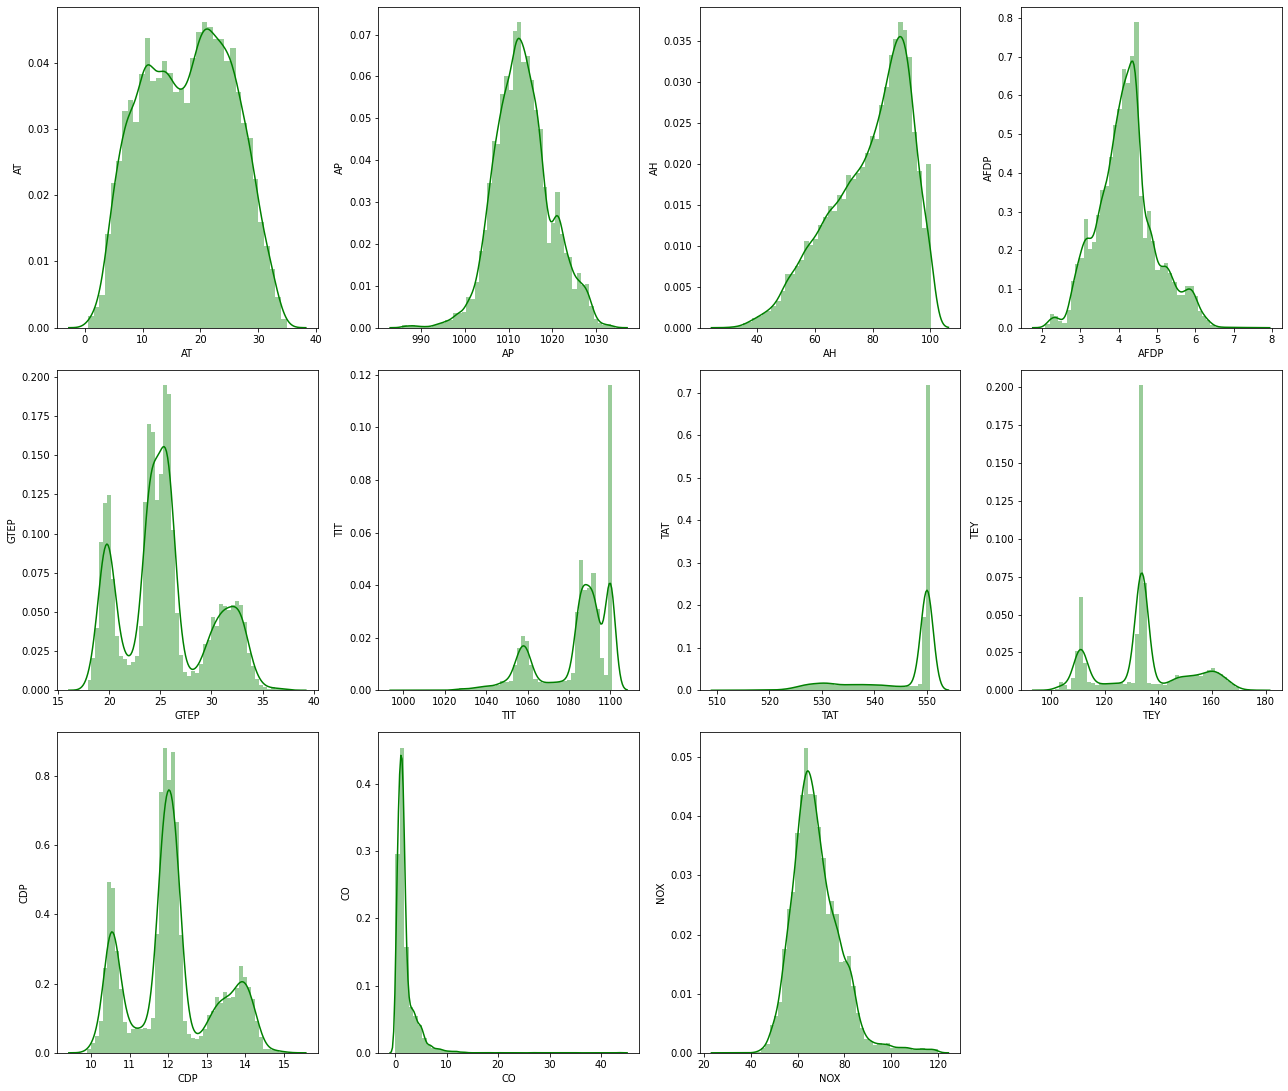

In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.distplot(gas_tubine[col],color='g')
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    

In [15]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


### Finding Correlation

In [16]:
corr = pd.DataFrame(data = gas_tubine.corr().iloc[:,7], index=gas_tubine.columns)

In [17]:
corr = corr.sort_values(by = 'TEY',ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


<AxesSubplot:title={'center':'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

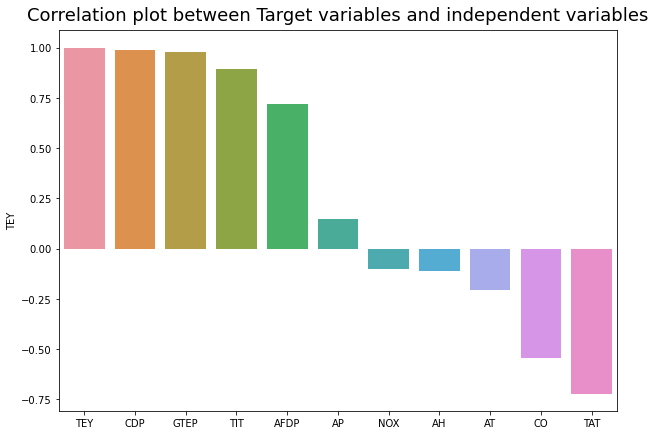

In [18]:
plt.figure(figsize=(10,7))
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

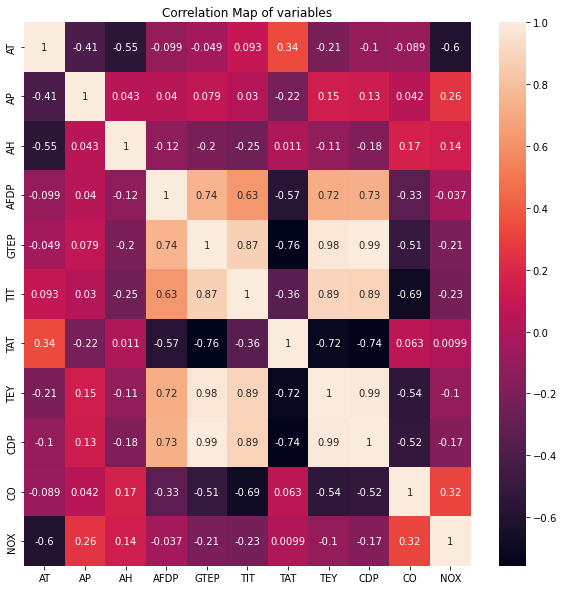

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(gas_tubine.corr(),annot=True)
plt.title("Correlation Map of variables")

# 4. Model Building

In [155]:
X = gas_tubine.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gas_tubine.loc[:,['TEY']]

### CROSS VALIDATION TECHNIQUE

In [157]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [158]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [160]:
from sklearn.model_selection import cross_val_score

In [161]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.15 (0.14) MSE


In [162]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.0119994, -1.0098575, -1.0141087, ..., -1.1376699, -1.0127207,
       -0.9795867], dtype=float32)

### Train-Test Split Model Validation Technique

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [164]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [165]:
prediction

array([ 0.00477274, -0.14861444, -0.7552343 , ...,  0.49390388,
       -0.84462726,  0.31057233], dtype=float32)

In [166]:
X = gas_tubine.drop(columns = ['TEY'], axis = 1) 
y = gas_tubine.iloc[:,7]

In [167]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [168]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50


In [169]:
model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [170]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [171]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = [early_stopping], validation_split = 0.1, epochs = num_epochs, verbose = 2)


Epoch 1/100
381/381 - 2s - loss: 2788.8911 - mean_squared_error: 2788.8911 - val_loss: 201.8141 - val_mean_squared_error: 201.8141 - 2s/epoch - 5ms/step
Epoch 2/100
381/381 - 1s - loss: 98.9952 - mean_squared_error: 98.9952 - val_loss: 69.0060 - val_mean_squared_error: 69.0060 - 1s/epoch - 3ms/step
Epoch 3/100
381/381 - 1s - loss: 40.2514 - mean_squared_error: 40.2514 - val_loss: 30.4105 - val_mean_squared_error: 30.4105 - 959ms/epoch - 3ms/step
Epoch 4/100
381/381 - 1s - loss: 19.1062 - mean_squared_error: 19.1062 - val_loss: 14.9536 - val_mean_squared_error: 14.9536 - 905ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 10.1202 - mean_squared_error: 10.1202 - val_loss: 7.8711 - val_mean_squared_error: 7.8711 - 1s/epoch - 3ms/step
Epoch 6/100
381/381 - 1s - loss: 5.8985 - mean_squared_error: 5.8985 - val_loss: 4.4836 - val_mean_squared_error: 4.4836 - 1s/epoch - 3ms/step
Epoch 7/100
381/381 - 1s - loss: 4.2205 - mean_squared_error: 4.2205 - val_loss: 4.1399 - val_mean_squared_error

In [172]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.8426 - mean_squared_error: 0.8426


In [173]:
predictions = model.predict_on_batch(X_test_scaled)

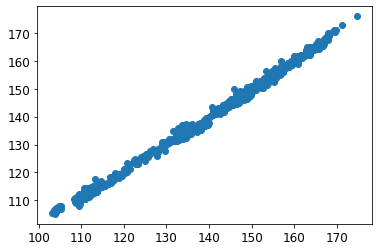

In [174]:
plt.scatter(y_test, predictions)

In [183]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.483353,0.017368
1,111.88,112.919937,0.929511
2,133.72,134.674942,0.714136
3,133.79,133.407242,0.286089
4,110.77,111.853127,0.977816
...,...,...,...
1499,132.85,132.818970,0.023357
1500,125.07,124.232704,0.669462
1501,160.95,161.740555,0.491180
1502,133.12,133.048691,0.053568


In [176]:
model.history.history.keys()

dict_keys([])

In [177]:
hist= print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error', 'accuracy', 'val_accuracy'])


In [178]:
scores = model.evaluate(X_train_scaled, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

423/423 [==============================] - 1s 1ms/step - loss: 0.8062 - mean_squared_error: 0.8062
mean_squared_error: 80.62%


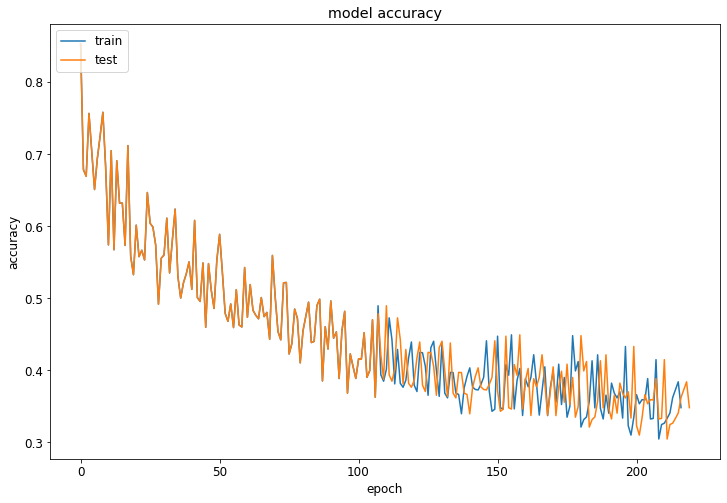

In [179]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 12
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got better model.

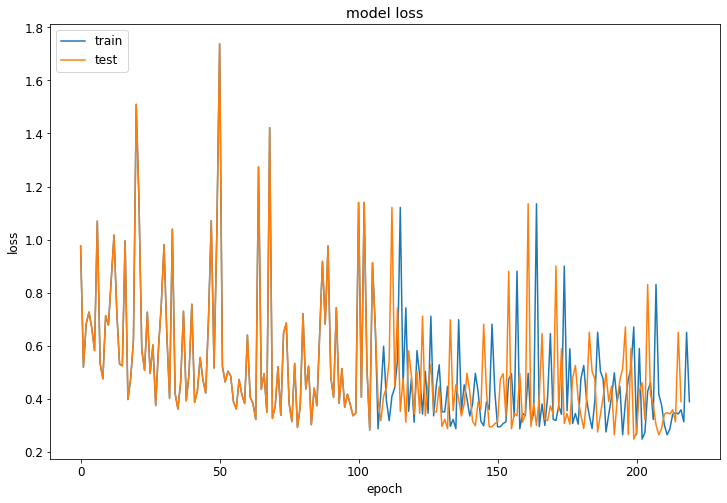

In [181]:
plt.figure(figsize=(12,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# END